Saving parkinsons_data.csv to parkinsons_data (1).csv
Feature shape: (1199, 4506)
Target shape: (1199,)
Target unique values: [0 1 2 3 4]
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7186 - loss: 1.3071 - val_accuracy: 0.7656 - val_loss: 0.6270
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8111 - loss: 0.5317 - val_accuracy: 0.9219 - val_loss: 0.2958
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9291 - loss: 0.2768 - val_accuracy: 0.9375 - val_loss: 0.1924
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9533 - loss: 0.1782 - val_accuracy: 0.9427 - val_loss: 0.1480
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9855 - loss: 0.0937 - val_accuracy: 0.9479 - val_loss: 0.1229
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9978 - loss: 0.0638 - val_accuracy: 0.9583 - val_loss: 0.1037
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9991 - loss: 0.0393 - val_accuracy:

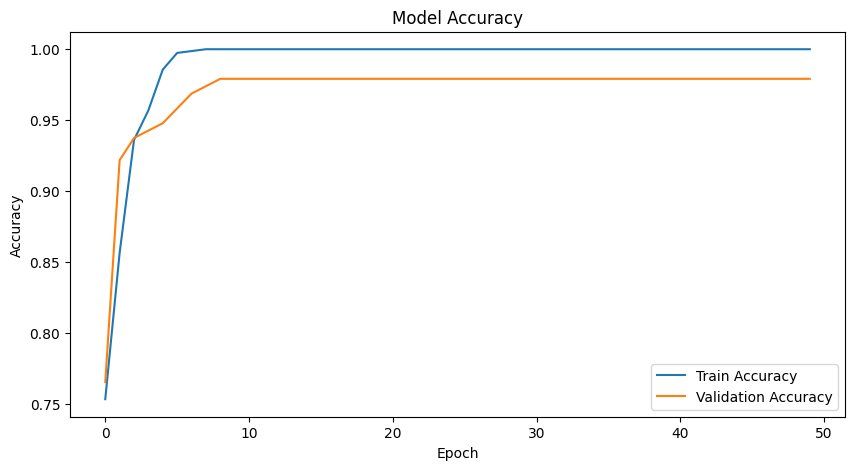

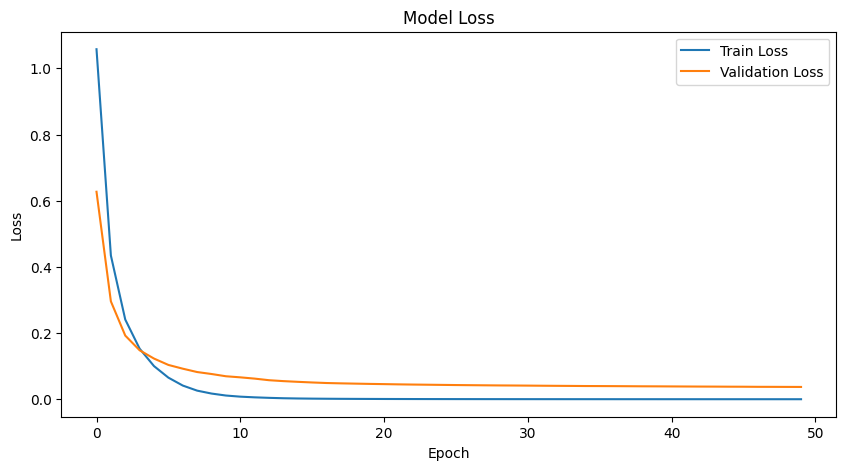

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9726 - loss: 0.0958  
Test Loss: 0.0779, Test Accuracy: 0.9792
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Confusion Matrix:
 [[184   0   0   0   0]
 [  0  22   0   0   0]
 [  0   2   4   0   0]
 [  0   1   2   5   0]
 [  0   0   0   0  20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       0.88      1.00      0.94        22
           2       0.67      0.67      0.67         6
           3       1.00      0.62      0.77         8
           4       1.00      1.00      1.00        20

    accuracy                           0.98       240
   macro avg       0.91      0.86      0.87       240
weighted avg       0.98      0.98      0.98       240

First 10 Predictions: [0 0 0 1 1 0 0 0 1 0]
First 10 True labels: [0 0 0 1 1 0 0 0 1 0]


In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

data = pd.read_csv(file_name)

data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() == len(data)])

target_col = 'Replication'
y = data[target_col]

if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

X_cat = pd.get_dummies(data[categorical_cols])
X_num = data.select_dtypes(include=['int64', 'float64'])

X_processed = pd.concat([X_num, X_cat], axis=1)
feature_names = X_processed.columns.tolist()

X = X_processed.values
X = X.astype('float32')
y = y.astype('int')

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target unique values:", np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Input(shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predicted_classes)
cr = classification_report(y_test, predicted_classes)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)

print("First 10 Predictions:", predicted_classes[:10])
print("First 10 True labels:", y_test[:10])

**This code plots multi-class ROC curves for the trained neural network.
It binarizes the test labels, predicts class probabilities, and computes
the false positive rate (FPR), true positive rate (TPR), and area under
the curve (AUC) for each class. The ROC curves visualize the model's
discriminative ability across all classes.**



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


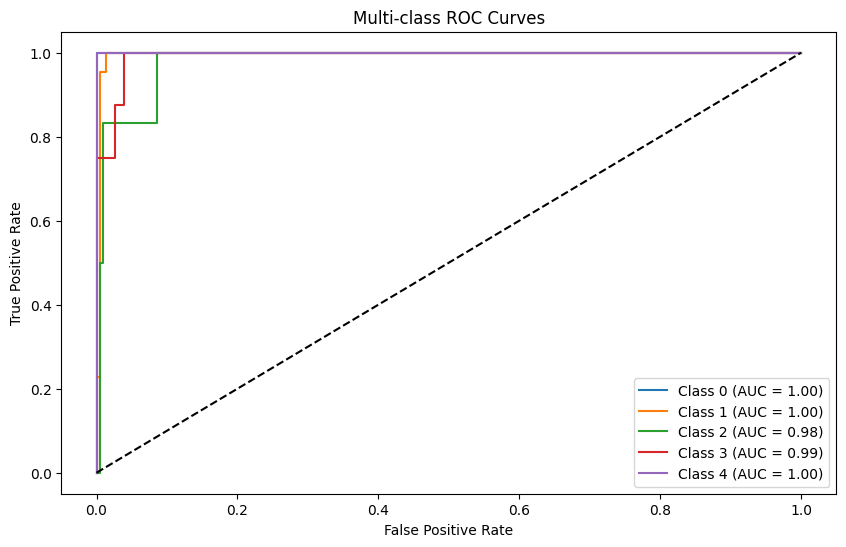

In [2]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test, classes=np.unique(y))
pred_prob = model.predict(X_test)

plt.figure(figsize=(10,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr,tpr):.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend()
plt.show()


**This code performs a t-SNE projection of the dataset to visualize high-dimensional features
in 2D space. Each class is plotted with a different color to explore clustering patterns
and separability between classes.**

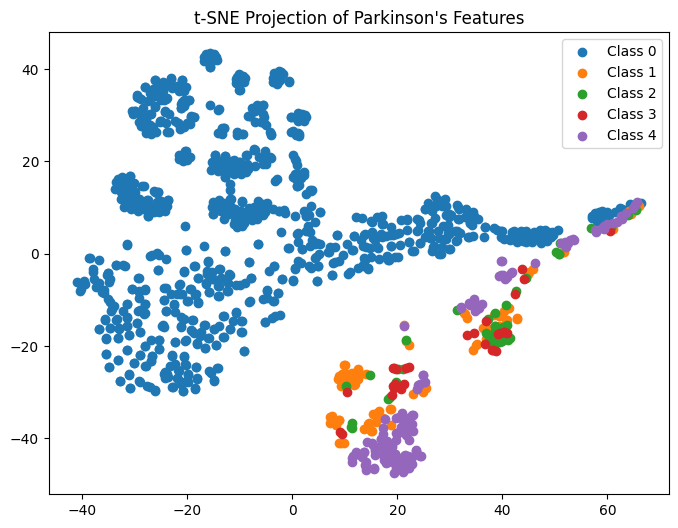

In [3]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(8,6))
for class_val in np.unique(y):
    idx = np.where(y==class_val)
    plt.scatter(X_embedded[idx,0], X_embedded[idx,1], label=f'Class {class_val}')
plt.legend()
plt.title('t-SNE Projection of Parkinson\'s Features')
plt.show()


**This code trains a Random Forest classifier on the dataset to compute feature importance.
It identifies which features contribute most to the model's predictions and optionally
visualizes them with a horizontal bar plot.**

N studies: 0.0097
P-value: 0.0612
Genetic locus_A2M: 0.0000
Genetic locus_ABCA3: 0.0006
Genetic locus_ABCA5: 0.0000
Genetic locus_ABCB1: 0.0000
Genetic locus_ACACA: 0.0000
Genetic locus_ACE: 0.0000
Genetic locus_ACMSD/TMEM163: 0.0016
Genetic locus_ACMSD/TMEM163 : 0.0003
Genetic locus_ACOT11: 0.0000
Genetic locus_ADAL/TUBGCP4: 0.0000
Genetic locus_ADAMTS16: 0.0000
Genetic locus_ADCYAP1R1: 0.0000
Genetic locus_ADH1C: 0.0000
Genetic locus_ADORA2A: 0.0004
Genetic locus_AGBL4: 0.0000
Genetic locus_AGPHD1: 0.0000
Genetic locus_AK095618: 0.0000
Genetic locus_ANKK1: 0.0001
Genetic locus_AP3B1: 0.0002
Genetic locus_APOB: 0.0000
Genetic locus_APOE: 0.0006
Genetic locus_ARNT: 0.0000
Genetic locus_ATHL1: 0.0000
Genetic locus_ATP13A2: 0.0000
Genetic locus_B2M: 0.0000
Genetic locus_BCHE: 0.0000
Genetic locus_BCL2: 0.0000
Genetic locus_BDNF: 0.0000
Genetic locus_BST1: 0.0027
Genetic locus_C10orf32: 0.0014
Genetic locus_C11orf74: 0.0000
Genetic locus_C15orf60: 0.0000
Genetic locus_C1orf175: 0.0000
Gen

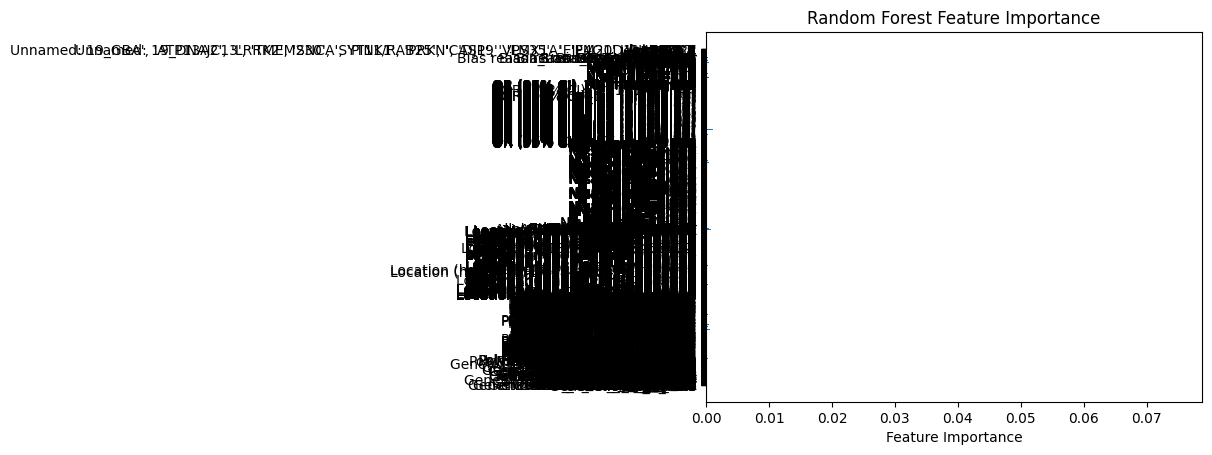

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
for i, v in enumerate(importances):
    print(f"{feature_names[i]}: {v:.4f}")

# Optional: plot
import matplotlib.pyplot as plt
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


**This code applies SHAP (SHapley Additive exPlanations) to interpret the neural network's
predictions. It computes SHAP values for a subset of test samples and visualizes the
impact of each feature on the model's outputs using a summary plot.**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4154/4154 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4160/4160 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
4157/4157 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
4163/4163 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

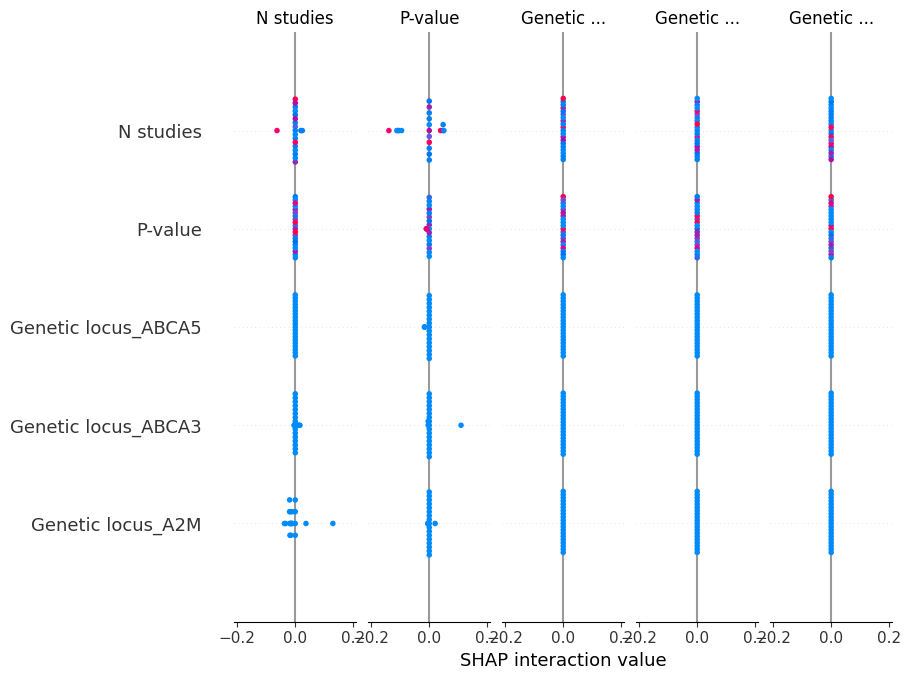

In [5]:
import shap

explainer = shap.KernelExplainer(model.predict, X_train[:50])  # smaller sample for speed
shap_values = explainer.shap_values(X_test[:20])

shap.summary_plot(shap_values, X_test[:20], feature_names=feature_names)


**This code trains the neural network with early stopping to prevent overfitting.
Training stops if the validation loss does not improve for a specified number of epochs,
and the model restores the best weights observed during training.**

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop])


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 8.0220e-05 - val_accuracy: 0.9792 - val_loss: 0.0370
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 7.7442e-05 - val_accuracy: 0.9792 - val_loss: 0.0369
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 7.9502e-05 - val_accuracy: 0.9792 - val_loss: 0.0367
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 7.3608e-05 - val_accuracy: 0.9792 - val_loss: 0.0366
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.7354e-05 - val_accuracy: 0.9792 - val_loss: 0.0364
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 6.7040e-05 - val_accuracy: 0.9792 - val_loss: 0.0363
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 5.9909e-05 - val_accuracy: 0.9844 - val_loss: 0.0362
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 6.

**This code prepares the true and predicted labels for multi-class ROC/AUC evaluation.
It binarizes the test labels and obtains predicted probabilities from the neural network
to compute ROC curves and AUC scores for each class.**

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = model.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


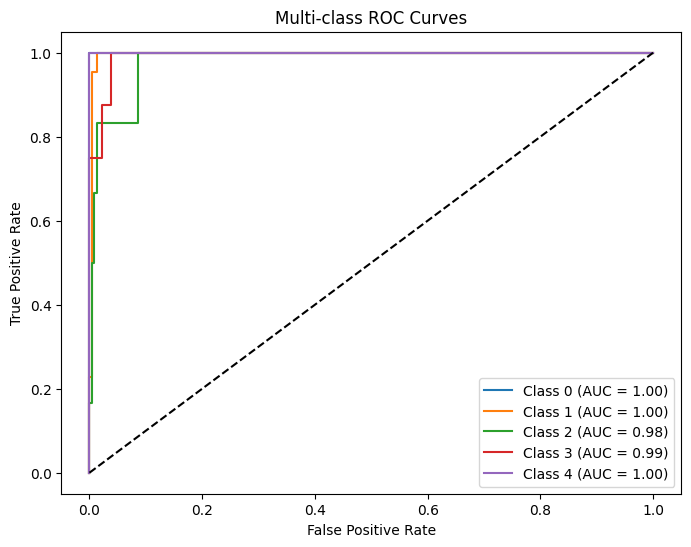

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

plt.figure(figsize=(8,6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curves')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_bin = model.predict(X_test)

# Compute AUC for each class
for i, class_label in enumerate(np.unique(y)):
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_bin[:, i])
    print(f"Class {class_label} AUC: {auc_score:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Class 0 AUC: 1.0000
Class 1 AUC: 0.9960
Class 2 AUC: 0.9808
Class 3 AUC: 0.9925
Class 4 AUC: 1.0000


**This code prepares the true and predicted labels for multi-class ROC/AUC evaluation.
It binarizes the test labels and obtains predicted probabilities from the neural network
to compute ROC curves and AUC scores for each class.**

In [ ]:
import nbformat

# Load the current notebook
notebook_filename = '/content/your_notebook.ipynb'
nb = nbformat.read(notebook_filename, as_version=5)

# Remove broken widget metadata
if 'widgets' in nb['metadata']:
    nb['metadata'].pop('widgets')

# Save cleaned notebook
nbformat.write(nb, notebook_filename)
print("Cleaned notebook saved.")
